In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# matplotlib.rcParams.update({'font.size': 25})

In [99]:
loss_df = pd.read_csv(r"../data/losses.csv")

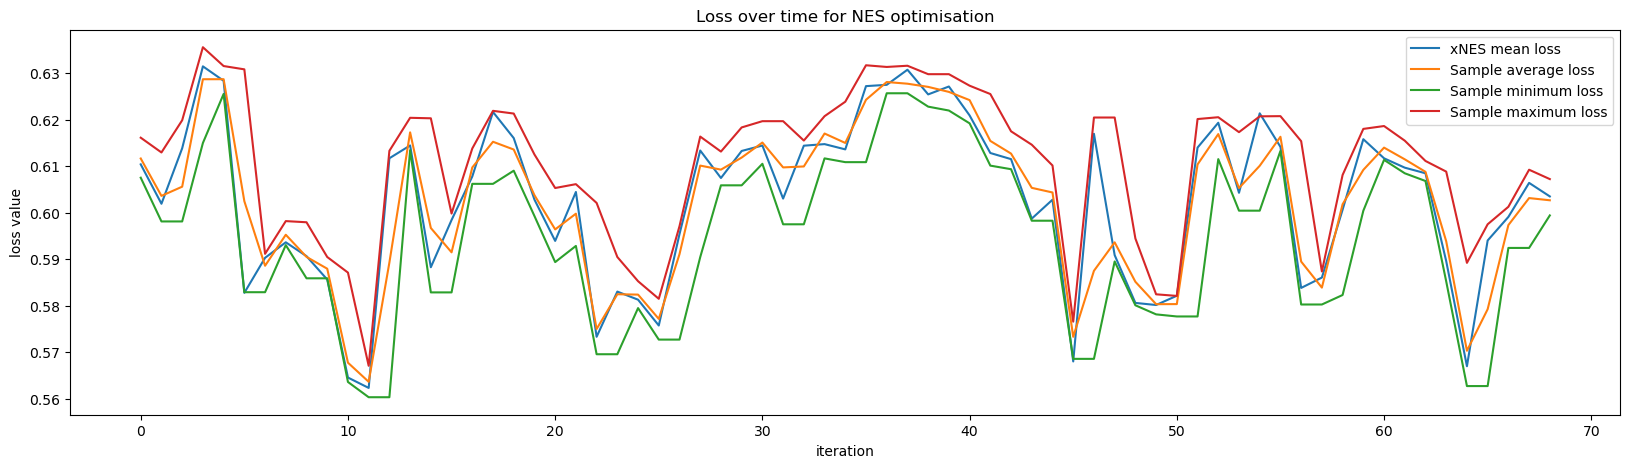

In [100]:
plt.figure(figsize=(20,5))
plt.plot(loss_df["mean"], label="xNES mean loss")
plt.plot(loss_df["avg"], label="Sample average loss")
plt.plot(loss_df["min"], label="Sample minimum loss")
plt.plot(loss_df["max"], label="Sample maximum loss")
plt.legend()
plt.xlabel("iteration")
plt.ylabel("loss value")
plt.title("Loss over time for NES optimisation")
plt.show()

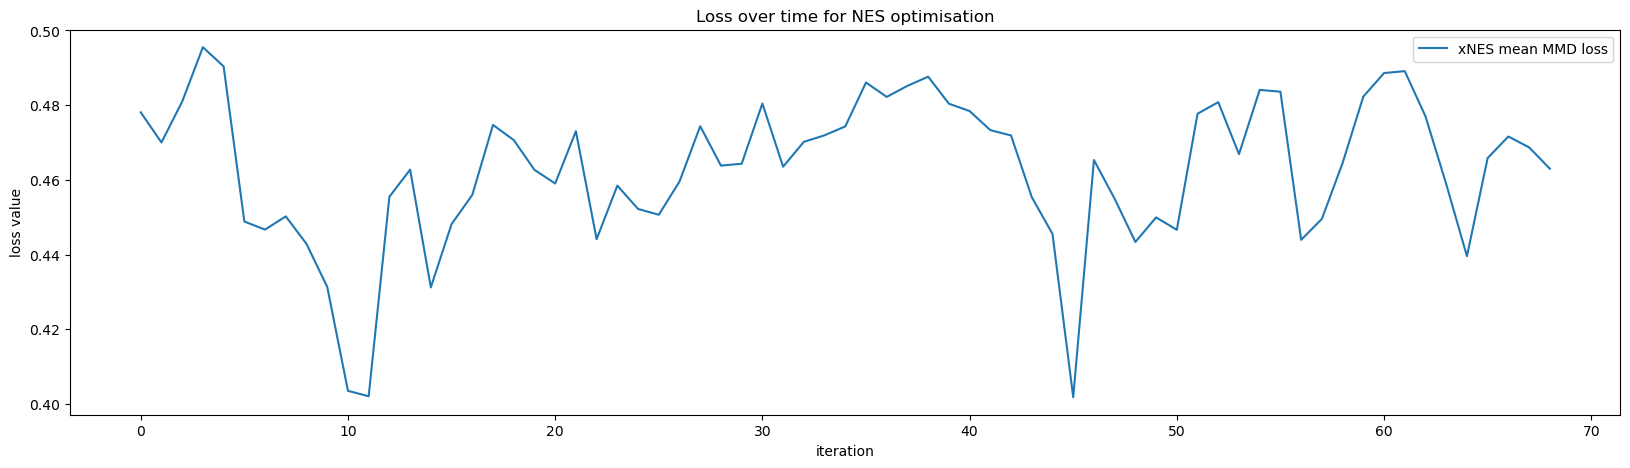

In [101]:
plt.figure(figsize=(20,5))
plt.plot(loss_df["mmd"], label="xNES mean MMD loss")
plt.legend()
plt.xlabel("iteration")
plt.ylabel("loss value")
plt.title("Loss over time for NES optimisation")
plt.show()

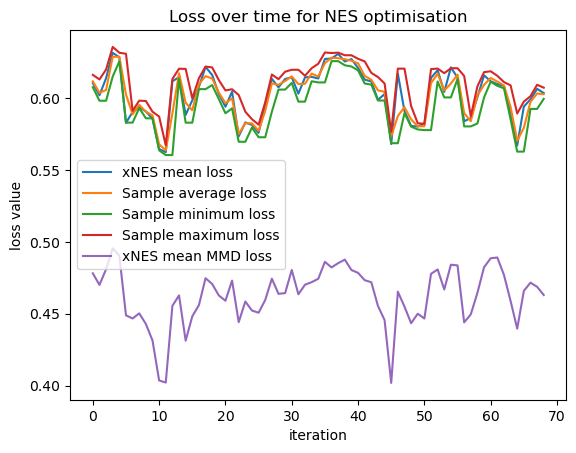

In [102]:
plt.plot(loss_df["mean"], label="xNES mean loss")
plt.plot(loss_df["avg"], label="Sample average loss")
plt.plot(loss_df["min"], label="Sample minimum loss")
plt.plot(loss_df["max"], label="Sample maximum loss")
plt.plot(loss_df["mmd"], label="xNES mean MMD loss")
plt.legend()
plt.xlabel("iteration")
plt.ylabel("loss value")
plt.title("Loss over time for NES optimisation")
plt.show()

In [103]:
standing_average = []
current = 0
for i, loss in enumerate(loss_df["mmd"]):
    current += loss
    standing_average.append(current / (i + 1))

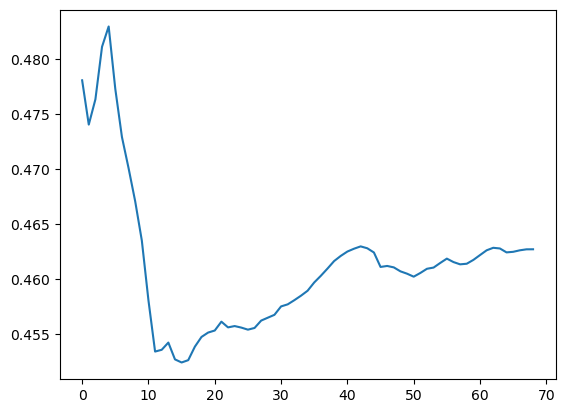

In [104]:
plt.plot(standing_average)